In [51]:
import pandas as pd
import folium as fm
import numpy as np

jan = pd.read_csv("January.csv")
feb = pd.read_csv("February.csv")
mar = pd.read_csv("March.csv")
apr = pd.read_csv("April.csv")
may = pd.read_csv("May.csv")
jun = pd.read_csv("June.csv")
jul = pd.read_csv("July.csv")
aug = pd.read_csv("August.csv")
sep = pd.read_csv("September.csv")
oct1 = pd.read_csv("October.csv")
nov = pd.read_csv("November.csv")
dec = pd.read_csv("December.csv")

combined = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oct1, nov, dec])

print(combined.tail(3))
print("Hi")

                 ride_id rideable_type           started_at  \
181803  A2BECB88430BE156  classic_bike  2022-12-08 16:27:47   
181804  37B392960E566F58  classic_bike  2022-12-28 09:37:38   
181805  2DD1587210BA45AE  classic_bike  2022-12-09 00:27:25   

                   ended_at             start_station_name start_station_id  \
181803  2022-12-08 16:32:20      Wacker Dr & Washington St     KA1503000072   
181804  2022-12-28 09:41:34  Sangamon St & Washington Blvd            13409   
181805  2022-12-09 00:35:28   Southport Ave & Waveland Ave            13235   

                end_station_name end_station_id  start_lat  start_lng  \
181803     Green St & Madison St   TA1307000120  41.883143 -87.637242   
181804  Peoria St & Jackson Blvd          13158  41.883165 -87.651100   
181805    Seeley Ave & Roscoe St          13144  41.948150 -87.663940   

          end_lat    end_lng member_casual  
181803  41.881859 -87.649264        member  
181804  41.877642 -87.649618        member  
18

In [53]:
print(combined.isnull().sum())


ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    834545
start_station_id      834677
end_station_name      891757
end_station_id        891898
start_lat                  0
start_lng                  0
end_lat                 5961
end_lng                 5961
member_casual              0
dtype: int64


In [54]:
duplicates_dict = {}

# Loop through each column and count the number of duplicate values
for column in combined.columns:
    # Count the number of duplicate entries in each column
    duplicates_count = combined.duplicated(subset=[column]).sum()
    duplicates_dict[column] = duplicates_count

duplicates_dict

{'ride_id': 0,
 'rideable_type': 5829027,
 'started_at': 931985,
 'ended_at': 918440,
 'start_station_name': 5827134,
 'start_station_id': 5827542,
 'end_station_name': 5827146,
 'end_station_id': 5827561,
 'start_lat': 5078092,
 'start_lng': 5120810,
 'end_lat': 5823670,
 'end_lng': 5823665,
 'member_casual': 5829028}

In [37]:
duplicates = combined[combined.duplicated(subset=combined.columns.difference(['ride_id']))]

duplicates

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
77335,014CA919F6DF3A6B,classic_bike,2023-02-19 12:10:52,2023-02-19 12:24:04,Orleans St & Merchandise Mart Plaza,TA1305000022,Green St & Randolph St*,chargingstx3,41.888243,-87.636390,41.883602,-87.648627,casual
75140,1E328212C8432CDD,electric_bike,2023-04-15 15:56:18,2023-04-15 16:01:54,Kedzie Ave & 45th St,342,Fairfield Ave & 44th St,380,41.810000,-87.700000,41.810000,-87.690000,casual
404536,307214F5C219C8D0,docked_bike,2023-04-21 09:45:26,2023-04-21 10:01:23,Michigan Ave & 8th St,623,Wentworth Ave & Cermak Rd*,chargingstx07,41.872773,-87.623981,41.853214,-87.631872,casual
410783,246D89EABAFA4F04,classic_bike,2022-06-18 13:18:24,2022-06-18 13:57:26,Adler Planetarium,13431,McClurg Ct & Ohio St,TA1306000029,41.866095,-87.607267,41.892592,-87.617289,casual
187082,0D6A2E5599EF5E40,classic_bike,2022-07-06 20:10:39,2022-07-06 21:43:13,Bissell St & Armitage Ave,13059,Bissell St & Armitage Ave*,chargingstx1,41.918018,-87.652182,41.918296,-87.652183,casual
547002,5E8E916D0993F39C,classic_bike,2022-07-31 13:14:49,2022-07-31 13:23:17,Damen Ave & Wellington Ave,13268,Lincoln Ave & Roscoe St*,chargingstx5,41.935880,-87.678420,41.943350,-87.670668,casual
547746,2ADA49FF029F71FC,classic_bike,2022-07-23 23:58:28,2022-07-24 00:06:34,Halsted St & Roscoe St,TA1309000025,Lincoln Ave & Roscoe St*,chargingstx5,41.943670,-87.648950,41.943350,-87.670668,member
716184,571BA6B539219FD6,classic_bike,2022-07-10 13:15:25,2022-07-10 13:15:52,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883602,-87.648627,41.883602,-87.648627,member
726535,8A13286881FBF422,classic_bike,2022-07-09 16:26:59,2022-07-09 17:13:09,Millennium Park,13008,Bissell St & Armitage Ave*,chargingstx1,41.881032,-87.624084,41.918296,-87.652183,casual
726856,4B9E7B4E6F1323B4,classic_bike,2022-07-21 18:07:58,2022-07-21 18:22:25,Southport Ave & Belmont Ave,13229,Bissell St & Armitage Ave*,chargingstx1,41.939478,-87.663748,41.918296,-87.652183,casual


In [55]:
combined_clean = combined.drop_duplicates(subset=combined.columns.difference(['ride_id']), keep='first')


In [56]:
duplicates = combined_clean[combined_clean.duplicated(subset=combined_clean.columns.difference(['ride_id']))]

duplicates

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [42]:
combined_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [43]:
combined

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [78]:
import pandas as pd

# Assuming 'combined_clean' is your DataFrame and it includes 'rideable_type', 'started_at', 'ended_at', and 'member_casual'

# Convert 'started_at' and 'ended_at' to datetime
combined_clean['started_at'] = pd.to_datetime(combined_clean['started_at'])
combined_clean['ended_at'] = pd.to_datetime(combined_clean['ended_at'])

# Function to create start and end events for a given rideable_type
def create_events(df, rideable_type):
    filtered_df = df[df['rideable_type'] == rideable_type]
    start_events = filtered_df[['started_at', 'member_casual']].rename(columns={'started_at': 'timestamp'}).assign(event_type='start')
    end_events = filtered_df[['ended_at', 'member_casual']].rename(columns={'ended_at': 'timestamp'}).assign(event_type='end')
    events = pd.concat([start_events, end_events]).sort_values('timestamp')
    return events

# Function to count members at the peak usage time
def count_members_at_peak(events, max_bikes_in_use):
    peak_times = events[events['bikes_in_use'] == max_bikes_in_use]['timestamp']
    in_use_during_peak = combined_clean[(combined_clean['started_at'] <= peak_times.min()) & (combined_clean['ended_at'] >= peak_times.min()) & (combined_clean['member_casual'] == 'member')]
    return in_use_during_peak['member_casual'].count()

# Create events for electric bikes
electric_events = create_events(combined_clean, 'electric_bike')

# Calculate cumulative sum of electric bikes in use over time
electric_events['bikes_in_use'] = electric_events['event_type'].map({'start': 1, 'end': -1}).cumsum()

# Find the maximum number of electric bikes in use at the same time
max_electric_bikes_in_use = electric_events['bikes_in_use'].max()

# Count the number of members at the peak time for electric bikes
members_at_peak_electric = count_members_at_peak(electric_events, max_electric_bikes_in_use)

# Create events for classic bikes
classic_events = create_events(combined_clean, 'classic_bike')

# Calculate cumulative sum of classic bikes in use over time
classic_events['bikes_in_use'] = classic_events['event_type'].map({'start': 1, 'end': -1}).cumsum()

# Find the maximum number of classic bikes in use at the same time
max_classic_bikes_in_use = classic_events['bikes_in_use'].max()

# Count the number of members at the peak time for classic bikes
members_at_peak_classic = count_members_at_peak(classic_events, max_classic_bikes_in_use)

print(f"Maximum Electric Bikes in Use: {max_electric_bikes_in_use}")
print(f"Members at peak electric bike usage: {members_at_peak_electric}")
print(f"Maximum Classic Bikes in Use: {max_classic_bikes_in_use}")
print(f"Members at peak classic bike usage: {members_at_peak_classic}")


Maximum Electric Bikes in Use: 484
Members at peak electric bike usage: 325
Maximum Classic Bikes in Use: 739
Members at peak classic bike usage: 319


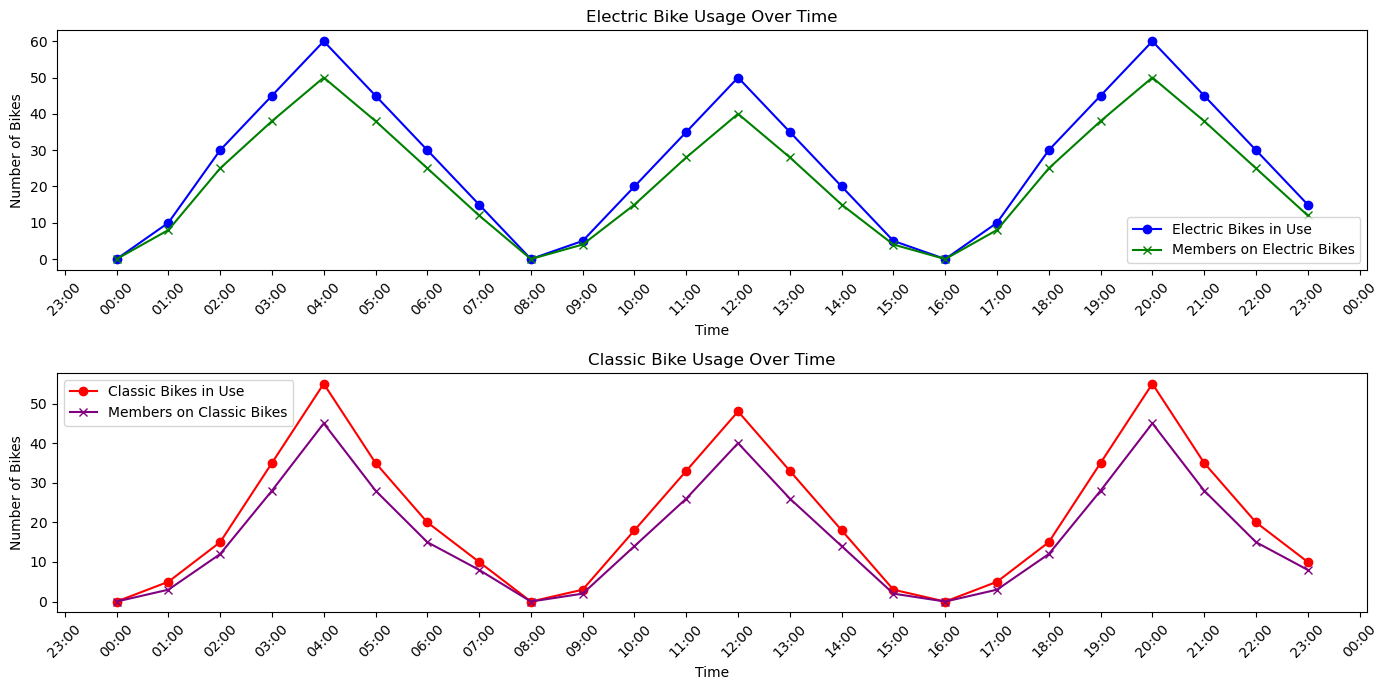

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have a DataFrame named 'combined_clean' with the correct data.
# The DataFrame 'combined_clean' should already include the 'bikes_in_use' column for electric and classic bikes.

# For demonstration purposes, let's create a sample DataFrame with cumulative usage over time.
# In your case, you will replace 'sample_df' with 'combined_clean'.
sample_df = pd.DataFrame({
    'timestamp': pd.date_range(start='2022-01-01', periods=24, freq='H'),
    'bikes_in_use_electric': [0, 10, 30, 45, 60, 45, 30, 15, 0, 5, 20, 35, 50, 35, 20, 5, 0, 10, 30, 45, 60, 45, 30, 15],
    'bikes_in_use_classic': [0, 5, 15, 35, 55, 35, 20, 10, 0, 3, 18, 33, 48, 33, 18, 3, 0, 5, 15, 35, 55, 35, 20, 10],
    'members_electric': [0, 8, 25, 38, 50, 38, 25, 12, 0, 4, 15, 28, 40, 28, 15, 4, 0, 8, 25, 38, 50, 38, 25, 12],
    'members_classic': [0, 3, 12, 28, 45, 28, 15, 8, 0, 2, 14, 26, 40, 26, 14, 2, 0, 3, 12, 28, 45, 28, 15, 8]
})

# Plot the data
plt.figure(figsize=(14, 7))

# Plot for electric bikes
plt.subplot(2, 1, 1)
plt.plot(sample_df['timestamp'], sample_df['bikes_in_use_electric'], label='Electric Bikes in Use', color='blue', marker='o')
plt.plot(sample_df['timestamp'], sample_df['members_electric'], label='Members on Electric Bikes', color='green', marker='x')
plt.title('Electric Bike Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Bikes')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format x-axis to show hours and minutes
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to hourly interval
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot for classic bikes
plt.subplot(2, 1, 2)
plt.plot(sample_df['timestamp'], sample_df['bikes_in_use_classic'], label='Classic Bikes in Use', color='red', marker='o')
plt.plot(sample_df['timestamp'], sample_df['members_classic'], label='Members on Classic Bikes', color='purple', marker='x')
plt.title('Classic Bike Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Bikes')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


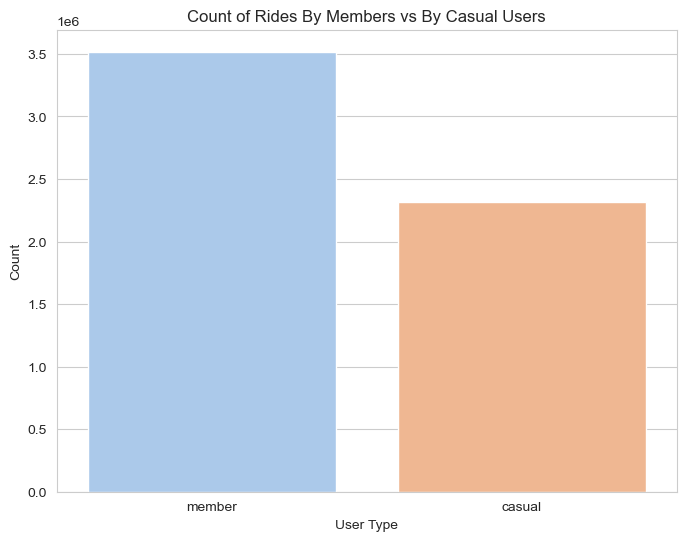

ValueError: Could not interpret value `timestamp` for parameter `x`

<Figure size 1400x700 with 0 Axes>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Example 1: Bar plot of the count of members vs. casual users
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_clean, x='member_casual', palette='pastel')
plt.title('Count of Rides By Members vs By Casual Users')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

# Example 2: Line plot showing hourly trend of bike usage
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_clean, x='timestamp', y='bikes_in_use_electric', label='Electric Bikes', marker='o')
sns.lineplot(data=combined_clean, x='timestamp', y='bikes_in_use_classic', label='Classic Bikes', marker='s')
plt.title('Hourly Trend of Bike Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bikes in Use')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example 3: Heatmap showing correlation between different numerical features
# For this example, let's assume combined_clean has some numerical features like trip duration etc.
plt.figure(figsize=(10, 8))
corr = combined_clean[['bikes_in_use_electric', 'bikes_in_use_classic', 'trip_duration']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Example 4: Distribution plot for trip duration
plt.figure(figsize=(8, 6))
sns.histplot(combined_clean['trip_duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Example 5: Pie chart for the proportion of bike types in use
bike_types = combined_clean['rideable_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bike_types, labels=bike_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Proportion of Bike Types in Use')
plt.show()

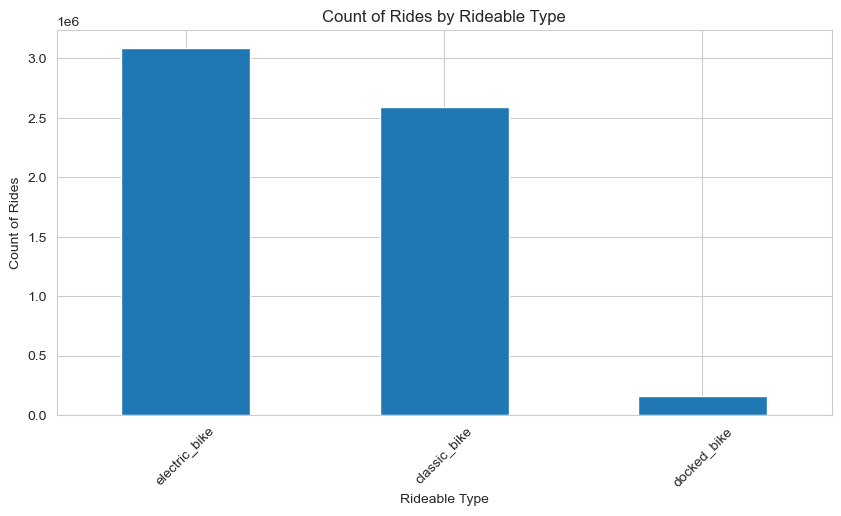

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'combined_clean' is your DataFrame with the column names you provided
# First, let's convert 'started_at' and 'ended_at' to datetime if they are not already
combined_clean['started_at'] = pd.to_datetime(combined_clean['started_at'])
combined_clean['ended_at'] = pd.to_datetime(combined_clean['ended_at'])

# Now let's create a new column for ride duration
combined_clean['ride_duration'] = (combined_clean['ended_at'] - combined_clean['started_at']).dt.total_seconds() / 60  # duration in minutes

# Next, let's create a bar chart for the count of rides by 'rideable_type'
rideable_type_counts = combined_clean['rideable_type'].value_counts()
plt.figure(figsize=(10, 5))
rideable_type_counts.plot(kind='bar')
plt.title('Count of Rides by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count of Rides')
plt.xticks(rotation=45)
plt.show()


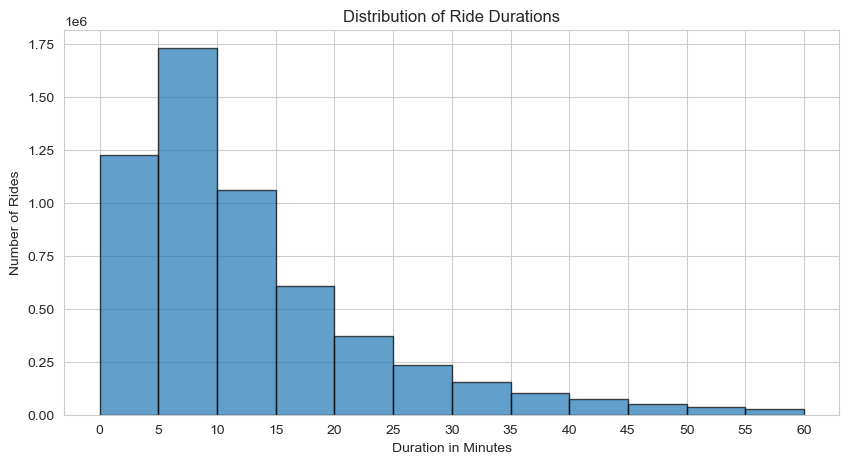

In [91]:
# Histogram of ride durations
plt.figure(figsize=(10, 5))
plt.hist(combined_clean['ride_duration'], bins=range(0, 61, 5), edgecolor='k', alpha=0.7)
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 61, 5))
plt.show()



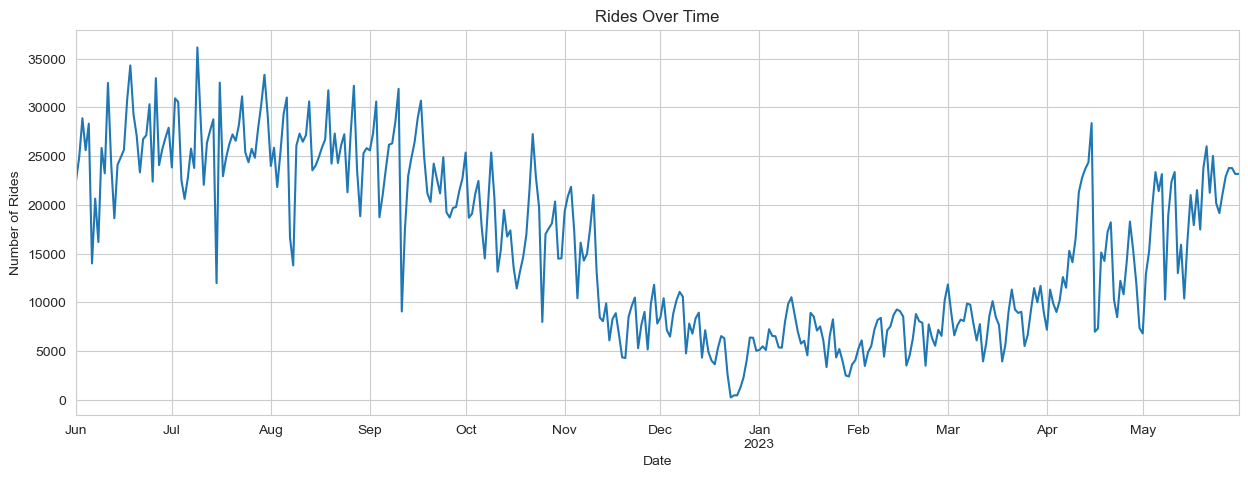

In [92]:
# Line plot for rides over time
combined_clean.set_index('started_at', inplace=True)
resampled_data = combined_clean.resample('D').size()  # resample data to daily frequency

plt.figure(figsize=(15, 5))
resampled_data.plot()
plt.title('Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()
